# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

# The dataset 

In [2]:
file_path = r"D:\Nadia\ML_DS_Projects\ds_datasets\Titanic-Dataset.csv"
titanic_data = pd.read_csv(file_path)

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

# # Explore the Dataset

In [6]:
# Check the total number of missing values in each column
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

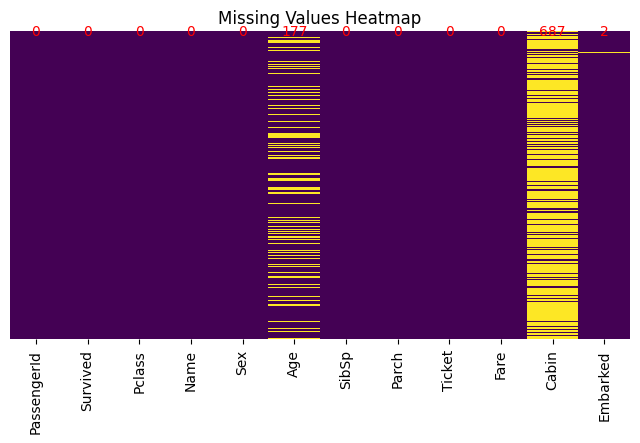

In [7]:
# creating heatmap to see where the data is missing:

missing_counts = titanic_data.isnull().sum()     # Calculate missing values per column
plt.figure(figsize=(8, 4))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')

# Add missing value counts above columns
for i, col in enumerate(titanic_data.columns):
    plt.text(i + 0.5, -2, f"{missing_counts[col]}", ha='center', va='center', fontsize=10, color='red')
plt.show()

In [8]:
# how many survived?
titanic_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [9]:
sns.set()

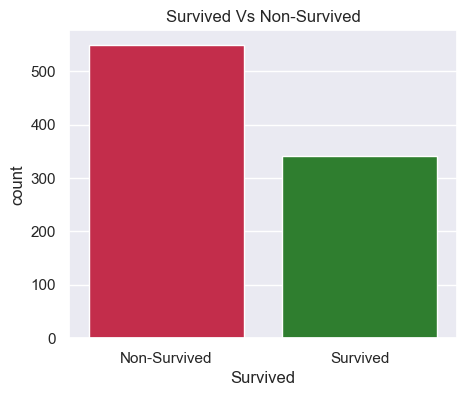

In [10]:
# Fix: Use string keys for the palette dictionary
palette_colors = {'0': 'crimson', '1': 'forestgreen'}

# Convert 'Survived' column to string for correct palette mapping
titanic_data['Survived'] = titanic_data['Survived'].astype(str)

plt.figure(figsize=(5, 4))

# Plot countplot with the corrected palette mapping
sns.countplot(x='Survived', data=titanic_data, hue='Survived', palette=palette_colors, legend=False)  

# Labeling
plt.xticks(ticks=[0, 1], labels=['Non-Survived', 'Survived'])
plt.title('Survived Vs Non-Survived')

plt.show()

In [11]:
# Total Gender count on ship?
titanic_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

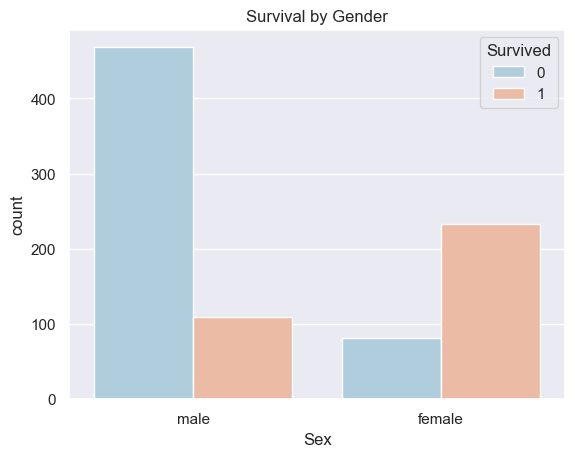

<Figure size 500x300 with 0 Axes>

In [12]:
# count of Survivors gender based:
sns.countplot(x='Sex', hue='Survived', data=titanic_data, palette='RdBu_r')         

# Define a fixed color palette for consistency
palette_colors = {'0': 'lightblue', '1': 'peachpuff'} 
plt.title('Survival by Gender')
plt.figure(figsize=(5, 3))
plt.show()

In [13]:
# Total count by Pclass wise?
titanic_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

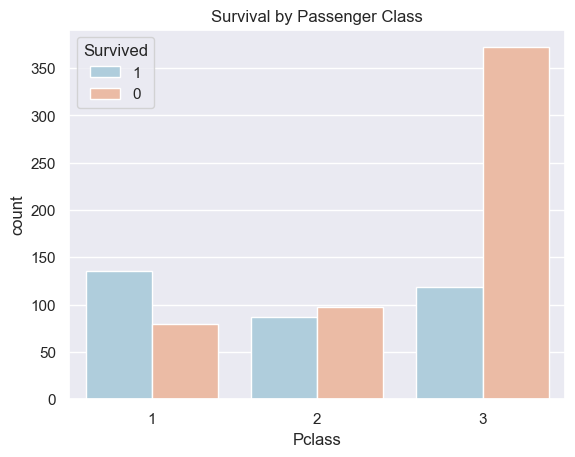

In [39]:
# count of survivors class wise: 
sns.countplot(x='Pclass', hue='Survived', data=titanic_data, palette='RdBu_r')
plt.title('Survival by Passenger Class')
plt.show()

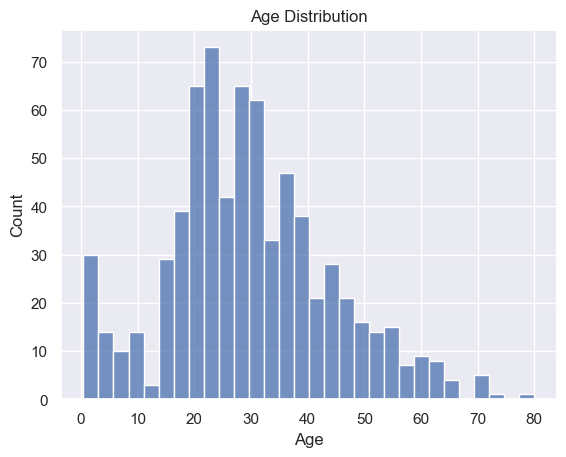

In [15]:
# Total passengers Age analysis:
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=False)
plt.title('Age Distribution')
plt.show()

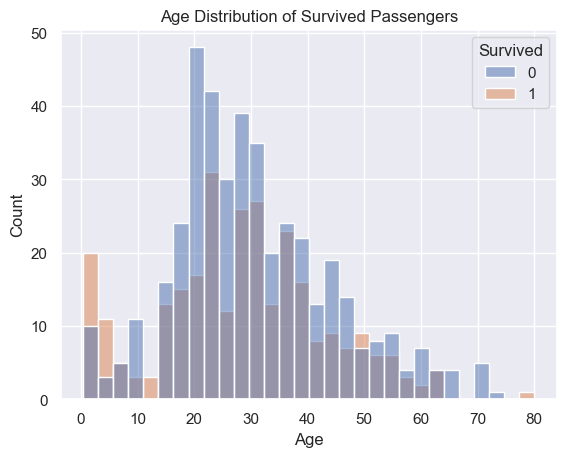

In [16]:
# survivors age analysis:
sns.histplot(data=titanic_data.dropna(subset=['Age']), x='Age', hue='Survived', bins=30, kde=False)
plt.title('Age Distribution of Survived Passengers')
plt.show()

# Data Preprocessing

## Data Cleaning

In [17]:
# dropping the Cabin column as it is not required:
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [18]:
# replacing the missing values with mean value in Age column:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [19]:
# fix Embarked column by using mode:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [20]:
# applying the index no.
print(titanic_data['Embarked'].mode()[0])

S


In [21]:
# replacing the mode value with the missing values:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [22]:
# to recheck any null value is left:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Converting the Categorical Columns

In [23]:
titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
# conveting categorical variables to binary:
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

In [25]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


#### Separating Features & Target 

In [26]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [27]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [28]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: object


#### Spliting the data into Training data and Test data

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit & transform training data
X_test = scaler.transform(X_test)  # Transform test data 

In [31]:
print(X.shape,X_train.shape,X_test.shape) 

(891, 7) (712, 7) (179, 7)


#####  Model Training 
###### Logistic Regression 

In [32]:
model = LogisticRegression()
# training the Logistic Regression model with training data:
model.fit(X_train, Y_train)

LogisticRegression()

##### Model Evaluation 

In [33]:
# predicting the training data:
X_train_prediction = model.predict(X_train)

In [34]:
print(X_train_prediction)

['0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '1' '1' '1'
 '0' '1' '0' '0' '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '1' '0' '0'
 '0' '1' '0' '1' '0' '0' '1' '0' '0' '0' '1' '0' '1' '1' '1' '0' '1' '0'
 '1' '0' '1' '1' '1' '1' '0' '0' '1' '0' '1' '0' '0' '0' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '0' '1' '0' '0' '0' '0' '0' '1'
 '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1'
 '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '0' '0' '0' '0'
 '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0'
 '0' '1' '1' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '0' '0' '0'
 '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '0' '0'
 '0' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1'
 '1' '1' '0' '1' '0' '1' '1' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '0' '0' '0' '1' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1'
 '1' '0' '1' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0

In [35]:
# predicting test data:
X_test_prediction = model.predict(X_test)

In [36]:
print(X_test_prediction)

['0' '0' '0' '1' '1' '1' '1' '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '1'
 '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '0' '1' '0' '1' '1' '1' '0' '0'
 '0' '1' '1' '0' '0' '0' '0' '0' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1'
 '0' '1' '0' '1' '1' '1' '0' '1' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '0' '0' '1' '1' '1' '0' '0' '1' '1' '0' '0' '0' '1' '1' '0' '0'
 '0' '0' '0' '0' '0' '0' '0' '0' '1' '0' '0' '0' '1' '0' '0' '0' '1' '0'
 '0' '0' '1' '0' '1' '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0'
 '1' '1' '1' '0' '1' '0' '0' '1' '0' '1' '1' '0' '0' '1' '0' '1' '0' '0'
 '1' '1' '0' '0' '1' '0' '0' '0' '0' '1' '0' '0' '0' '1' '1' '1' '0' '0'
 '0' '1' '0' '0' '0' '1' '0' '0' '1' '1' '0' '1' '0' '0' '0' '1' '1']


In [50]:
# Calculate accuracy:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
# Accuracy Score:
print(f"Training Accuracy: {training_data_accuracy:.4f}") 
print(f"Test Accuracy: {test_data_accuracy:.4f}")

Training Accuracy: 0.8034
Test Accuracy: 0.7989


The training accuracy is 80% which is similar to the test accuracy score which is 80%.
This suggests that the model generalizes well and is not overfitting nor underfitting. 

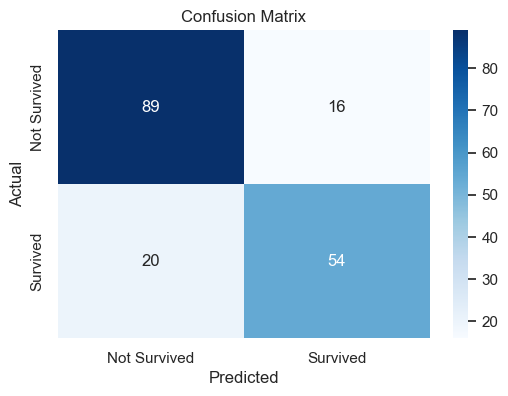

In [51]:
# Generate Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Plot the Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
from sklearn.metrics import classification_report

# Generate Classification Report
report = classification_report(Y_test, X_test_prediction)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

